In [1]:
import plotly.express as px
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
churn_data = pd.read_csv('data/churn.csv')
churn_data.drop('RowNumber', axis=1,inplace=True)
churn_data['Loyalty'] = churn_data['Exited'].apply(lambda x: 'Loyal' if x==0 else 'Not loyal')
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Not loyal
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Loyal
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Not loyal
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Loyal
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Loyal


# ---------------------------------------Tasks-----------------------------------------

###  1) Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

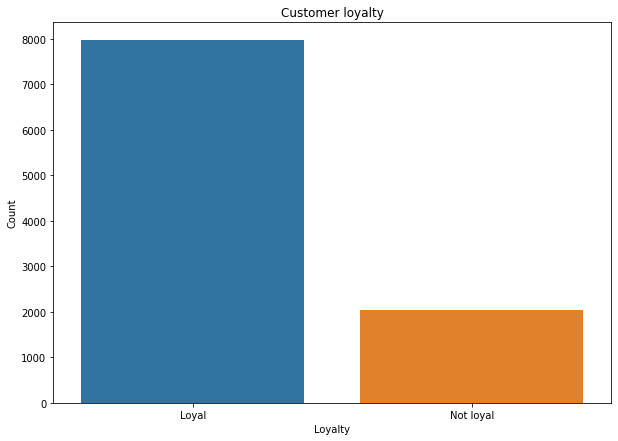

In [2]:


loyalty_croped = churn_data.groupby('Loyalty', as_index=False)['CustomerId'].count()
fig  = plt.figure(figsize=(10,7))
barplot = sns.barplot(
    data=loyalty_croped,
    x='Loyalty',
    y='CustomerId',
)
barplot.set_ylabel("Count")
barplot.set_title('Customer loyalty');


#### Лояльных клиентов в 4 раза больше, чем ушедших, что в целом, показывает хорошую работоспособность банка
# -----------------------------------------------------------------------------------

###  2) Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

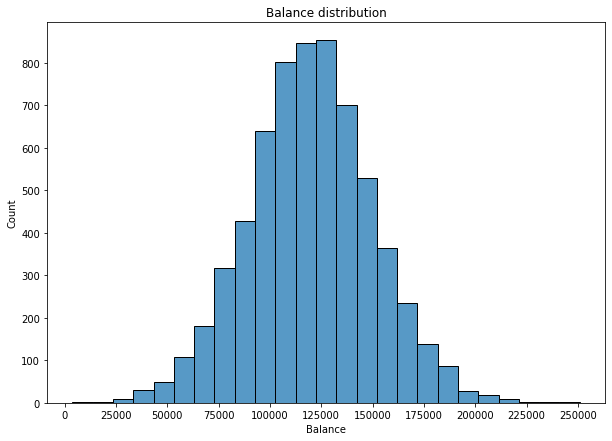

In [3]:
from turtle import title


rich_users = churn_data[churn_data['Balance']>2500]
fig = plt.figure(figsize=(10, 7))
hist = sns.histplot(
    data=rich_users['Balance'],
    bins=25,
)
hist.set_title('Balance distribution', fontsize=12)
hist.set_xticks(range(0, 260000, 25000));

#### Большинство "богатых" пользователей банка имеет на своём счету от 100 до 150 тысяч долларов, но есть и исключения, как с относительно малыми, так и с большими суммами 
# -----------------------------------------------------------------------------------

### 3) Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

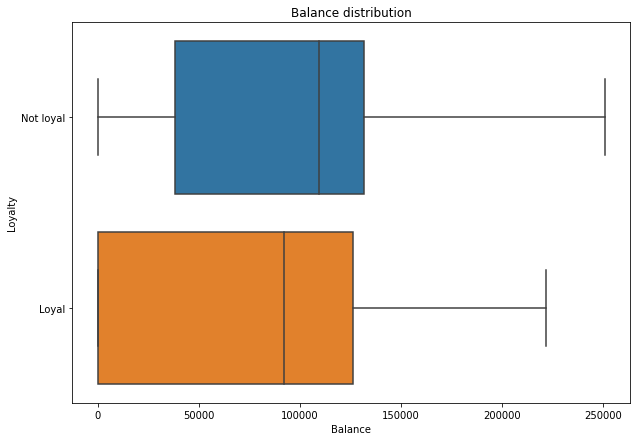

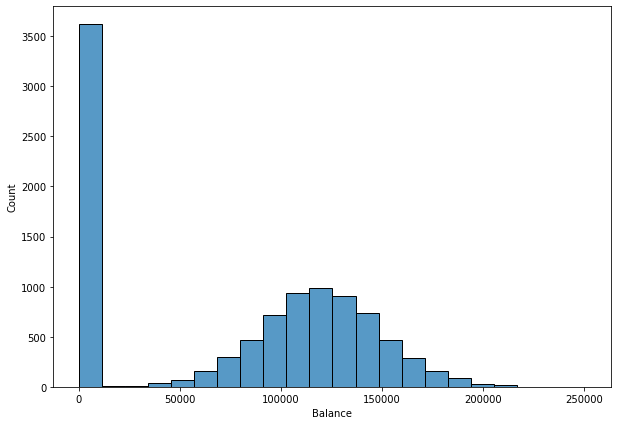

In [4]:
# balance_compare = churn_data.groupby('Exited')['Balance'].mean()
# balance_box = px.box(
#     data_frame=churn_data,
#     x='Balance',
#     color='Exited'
# )
# balance_box.show()
fig = plt.figure(figsize=(10,7))
balance_box = sns.boxplot(
    data=churn_data,
    y='Loyalty',
    x='Balance'
    )
balance_box.set_title('Balance distribution')
fig = plt.figure(figsize=(10,7))
his = sns.histplot(
    data=churn_data,
    x='Balance'
)

#### У ушедших клиентов клиентов меньший разброс суммы баланса в стабильно больших пределах, чем у лояльных клиентов, что может свидетельствовать о невыгодных условиях банка для вкладчиков с большими суммами.
# -----------------------------------------------------------------------------------

### 4) Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

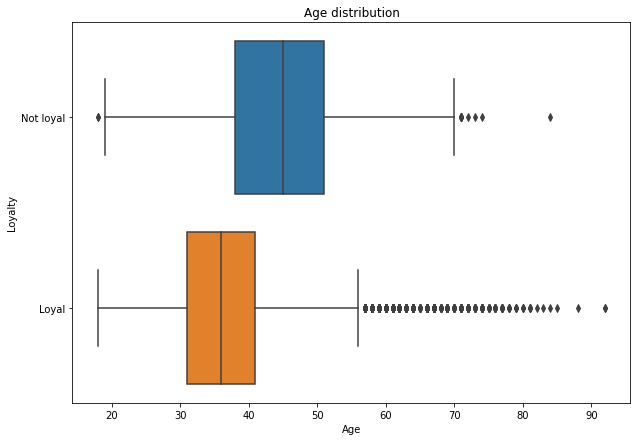

In [5]:
fig = plt.figure(figsize=(10,7))
age_box = sns.boxplot(
    data=churn_data,
    y='Loyalty',
    x='Age'
    )
age_box.set_title('Age distribution');

#### В группе лояльных клиентов наблюдается большое количество потенциальных выбросов, банку стоит обратить внимание на клиентов старше 60 лет
# -----------------------------------------------------------------------------------

### 5) Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [6]:
# payment_scatter = sns.jointplot(
#     data=churn_data,
#     x='CreditScore',
#     y='EstimatedSalary',
#     hue='Exited',
#     height=10,
# )
payment_scatter = px.scatter(
    data_frame=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    color='Loyalty',
    title='Relationship between credit score and salary'
)
payment_scatter.show()

#### Явной взаимосвязи между этими признаками не наблюдается для обеих групп :с
# -----------------------------------------------------------------------------------

### 6) Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

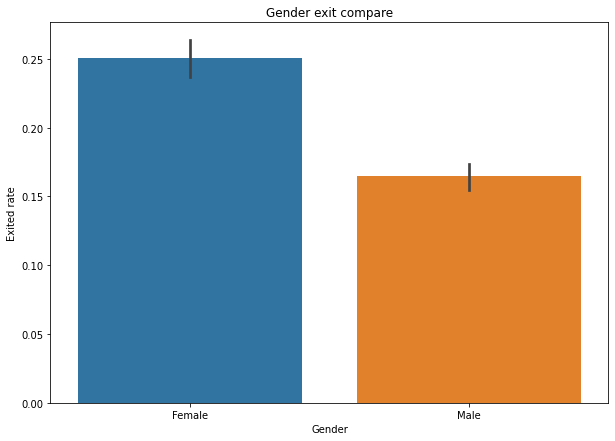

In [7]:
# gender_exited = churn_data.groupby('Gender',as_index=False)['Exited'].mean()
fig = plt.figure(figsize=(10,7))
gender_exited_bar = sns.barplot(
    data=churn_data,
    x='Gender',
    y='Exited',
)
gender_exited_bar.set_ylabel('Exited rate')
gender_exited_bar.set_title('Gender exit compare');

#### Клиенты женского пола уходят ~ на 10% чаще
# -----------------------------------------------------------------------------------

### 7) Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

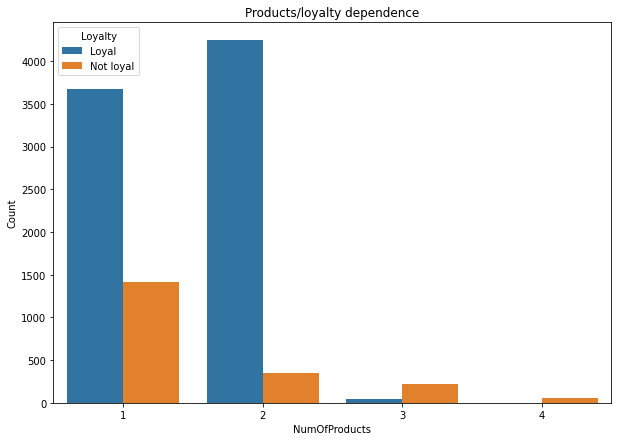

In [9]:
exited__comp_products = churn_data.groupby(['NumOfProducts', 'Loyalty'], as_index=False)['CustomerId'].count()
fig = plt.figure(figsize=(10,7))
bar = sns.barplot(
    data=exited__comp_products,
    x='NumOfProducts',
    y='CustomerId',
    hue='Loyalty',
)
bar.set_title('Products/loyalty dependence')
bar.set_ylabel('Count');

#### На построенной диаграмме можно видеть уменьшение оттока клиентов при увелечении числа приобретённых услуг.
# -----------------------------------------------------------------------------------

### 8) Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

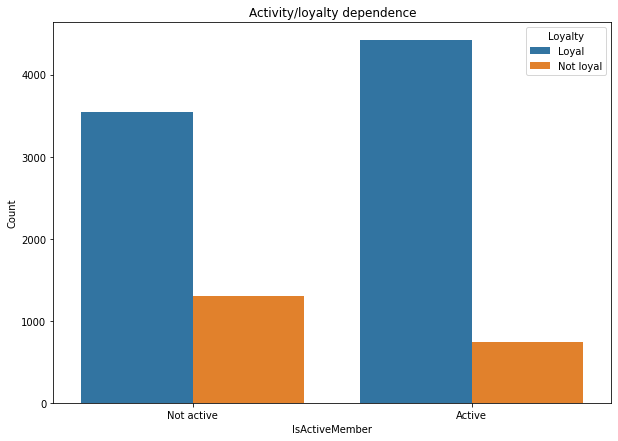

In [10]:
exited__comp_active = churn_data.groupby(['IsActiveMember', 'Loyalty'], as_index=False)['CustomerId'].count()
fig = plt.figure(figsize=(10,7))
bar = sns.barplot(
    data=exited__comp_active,
    x='IsActiveMember',
    y='CustomerId',
    hue='Loyalty',
)
bar.set_title('Activity/loyalty dependence')
bar.set_ylabel('Count')
bar.set_xticklabels(['Not active', 'Active']);

#### Среди неактивных клиентов наблюдается бОльший отток. Возможно банку стоит пересмотреть политику в отношении неактивных клиентов и подумать над предложениями/условиями, которые могут увеличить лояльность среди неактивных клиентов.
# -----------------------------------------------------------------------------------


### 9) В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [11]:
countries_ex = churn_data.groupby('Geography', as_index=False).agg('mean')
fig = px.choropleth(
    data_frame=countries_ex, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 0.4], #диапазон цвета
    title='Exit rate by country', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Greens' #палитра цветов
)
fig.show()

#### Больше всего ушедших клиентов в Германии, возможно клиенты предпочитают другие банки данному, то есть наш банк не справляется с конкуренцией
# -----------------------------------------------------------------------------------


### 10) На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

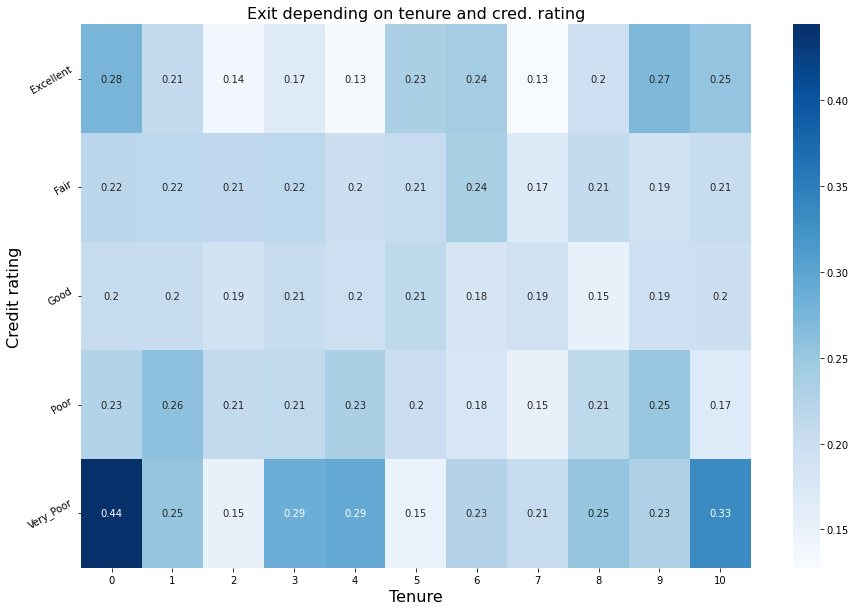

In [12]:

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat).astype('category')
CreditsTenure = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)
fig = plt.figure(figsize=(15,10))
heatmap = sns.heatmap(
    data=CreditsTenure,
    cmap='Blues',
    annot=True
)
heatmap.set_title('Exit depending on tenure and cred. rating', fontsize=16)
heatmap.set_xlabel('Tenure', fontsize=16)
heatmap.set_ylabel('Credit rating', fontsize=16)
heatmap.yaxis.set_tick_params(rotation=30)




#### На тепловой карте видно, что чаще всего уходят клиенты с кредитным рейтингом от 300 до 500 (преобладают новые клиенты с нулевым количеством лет пользования банком)